<a href="https://colab.research.google.com/github/valenciajaime/MN2022_colabs/blob/main/MN2022_1_TallerMJ_S01_EF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portada Taller MJS01

**Nombres:** 



**Email:**


**Curso:**
Metodos numericos 2022-1

**Fecha:**
Jueves 2022-mayo-26

**Fecha Edicion Final: **

Miercoles 22-junio-01

# Descripción

**Objetivos:**

Primer taller de seguimiento sobre solucion de sistemas lineales.


**Ejemplos includios:**



1.   Funcion de Iteracion de Jacobi
2.   Funcion del metodo de Jacobi
   






# Ejemplos incluidos

Funcion iteracion Jacobi

In [ ]:
import numpy as np
import matplotlib.pylab as plt

A = [[10,-1,2,0],[-1,11,-1,3],[2,-1, 10, -1],[0, 3, -1, 8]] #Lista de listas

b = [[6],[25],[-11],[15]] #lista

A1 = np.array(A)
b1 = np.array(b)
print(A1)
print(b1)

X_inicio = np.array([[0], [0], [0],[ 0]]) #vector columna


def Iter_Jacobi(AA, bb, X0):
  """Funcion de una iteracion de Jacobi
     sistema AA x = bb
     AA: matriz (np.array(n,n))
     bb: vector (np.array(n,1))
     X0: vector )np.array(n,1))
  """
  X_new = np.zeros(X0.shape)
  N = len(bb)
  for i in range(N):
    Tsum = 0
    for j in range(N):
      if i!=j:
        Tsum = Tsum - AA[i,j]*X0[j]
    Tsum = (Tsum + bb[i])/AA[i,i]
    X_new[i] = Tsum
  return X_new


X1 = Iter_Jacobi(A1,b1,X_inicio)
print("X1: \n",X1)

X2 =  Iter_Jacobi(A1,b1,X1)
print("X2: \n",X2)

X3 =  Iter_Jacobi(A1,b1,X2)
print("X3: \n",X3)


[[10 -1  2  0]
 [-1 11 -1  3]
 [ 2 -1 10 -1]
 [ 0  3 -1  8]]
[[  6]
 [ 25]
 [-11]
 [ 15]]
X1: 
 [[ 0.6       ]
 [ 2.27272727]
 [-1.1       ]
 [ 1.875     ]]
X2: 
 [[ 1.04727273]
 [ 1.71590909]
 [-0.80522727]
 [ 0.88522727]]
X3: 
 [[ 0.93263636]
 [ 2.05330579]
 [-1.04934091]
 [ 1.13088068]]


Funcion Metodo Jacobi

In [ ]:
###Esquema Iteracion 
def Metodo_Jacobi(AA,bb,X0, Max_Iter=10, Tol=0.0001):
  """Metodo de Jacobi para solucion iterativa de
     AA x = bb
     
  """
  X_old = X0
  C_iter = 1 #contador iteraciones
  C_error = 1 #error inicial
  while C_iter<Max_Iter and C_error>Tol:
    X_new = Iter_Jacobi(AA,bb, X_old)
    print("Iteracion: ",C_iter)
    print("Vector: ",X_new)

    ##incremento contador
    C_iter += 1
    #Nuevo Error
    C_error = np.linalg.norm(X_new - X_old)
    print("Error: ",C_error)

    #reiniciar
    X_old = X_new
  print("Sale ciclo while")
  return X_new, C_iter, C_error

Metodo_Jacobi(A1,b1,X_inicio, Max_Iter=10, Tol=0.5)


# Problemas propuestos

Escribir el codigo para resolver los ejercicios del texto de Burden y Faires adjuntos.

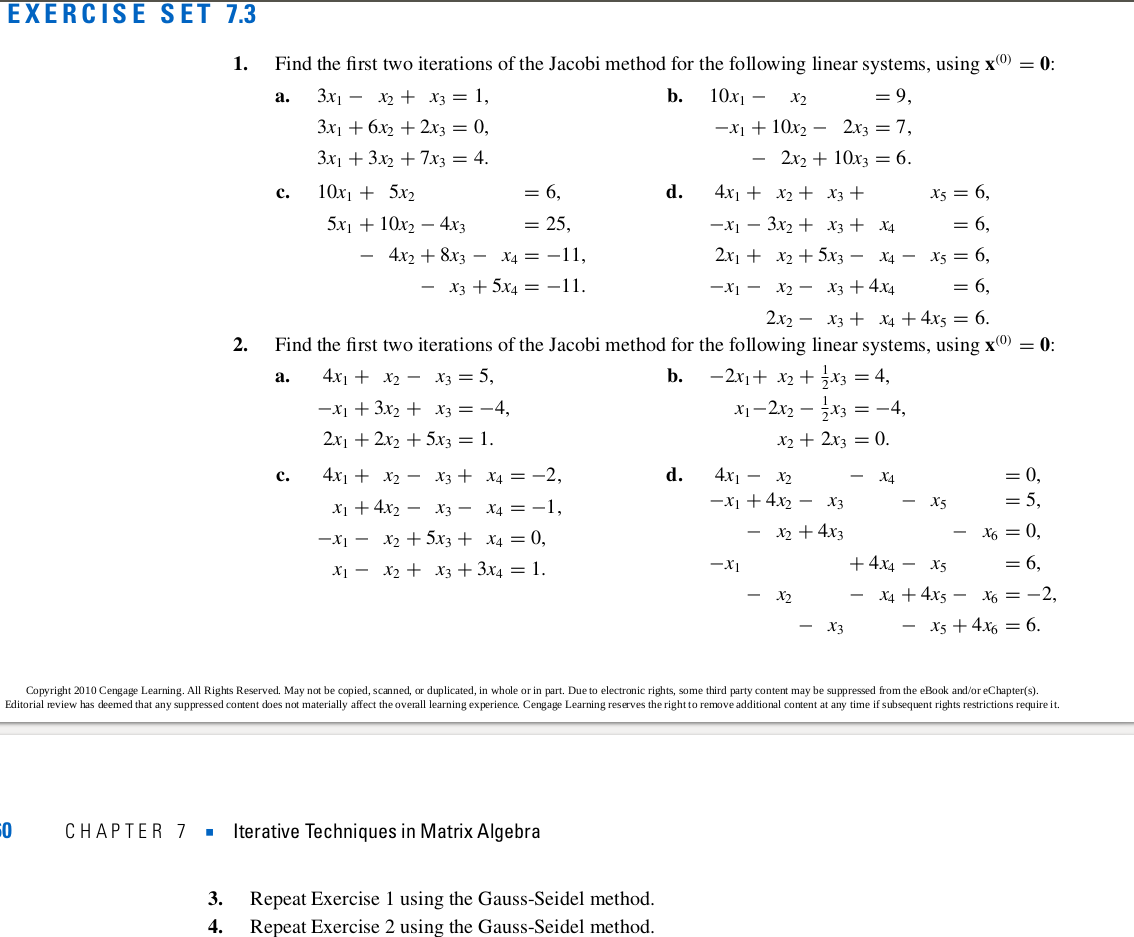

# **Jairo Manuel Garavito**

Solución del ejercicio 1.a, usando gauss-seidel

In [ ]:
def seidel(a, x ,b):
    """
    
    esta función se basa en el metodo de gauss-seidel, solo realiza una iteración 
    
    Parameters
    ----------
    a : lista 
        matriz de coeficientes.
    x : lista
        vector inicial.
    b : lista 
        valores independientes.

    Returns
    -------
    x : TYPE
        solución del sistema.

    """
    #encontrar la longitud del vector solucion        
    n = len(a)                   
    # iteramos con base al numero de elmentos de la mtriz
    for j in range(0, n):        
        # variable temporal 
        d = b[j]                  
          
        # calcular respectivamente xi, yi, zi, teniendo en cuenta el origen 
        for i in range(0, n):     
            if(j != i):
                d-=a[j][i] * x[i]
        # actualizando el valor de nuestra solucion         
        x[j] = d / a[j][j]
    # retorna el vector solucion actulizado       
    return x    
   
# ingreso de variables                
# ejercicio 1.a       
               
x = [0, 0, 0]                        
a = [[3,-1,1],[3,6,2],[3,3,7]]
b = [1,0,4]

  
#ejecutando ciclo  por m veces dependiendo de el valor del error
for i in range(0, 2):            
    x = seidel(a, x, b)
    #print each time the updated solution
    print("vector solución : ", x)  

vector solución :  [0.3333333333333333, -0.16666666666666666, 0.5]
vector solución :  [0.11111111111111112, -0.22222222222222224, 0.619047619047619]


Introduzca el número mu de la variable independiente X y el número nu de la ecuación:2 0.12 3 3


ValueError: ignored

# jeferson benavides - jacobimetodo

In [ ]:

import numpy as np 

#NOTACION

# A:matriz de variables a solucionar
# D:matriz de valores independientes
# L: matriz triangular inf de A
# U: matriz triangular Supde A
 
 #--------------------------------

#FUNCION PARA EL METODO

# A: matriz de ecuaciones, b=vector de valores indep, x0=vector de variables para inicializar, error: tolerancia, n: # iteraciones

#------------------------------

def jacobi(A, b, x0, tol, n):
  """
  A: matriz que representa al sistema de ecuaciones
  b: vector de valores independientes
  x0: vector de variables para inicializar el método
  tol: tolerancia
  n: número de iteraciones. 
  
  """

  D = np.diag(np.diag(A)) # obtemgp la matriz diagonal de A
  LU = A - D 
  x = x0 #vector de inicializacion 

  for i in range(n): 
    D_inv = np.linalg.inv(D) #Inversa de D
    xtemp = x #guarda los valores de la iteracion anterior cuando haga la funcion, calcula el ciclo para la tolerancia
    x = np.dot(D_inv, np.dot(-LU,x)) + np.dot(D_inv,b) #defino la funcion x, que va a hacer el producto entre matrices (inverso vs. )
    print("Iteración", i,": x = ", x)
    if np.linalg.norm(x-xtemp) < tol: 
        return x
  return x

  #PARAMETROS INICIALES:

  #1.a
A = np.array([[3,-1,1],[3,6,2],[3,3,7]]) #lista de listas
b = np.array([1,0,4]) #vector independiente
x0 = np.zeros(3) #vector de inicialización, osea el vector de orden "n"
tol = 1e-3 #tolerancia
n = 300 #número de iteraciones
  
x = jacobi(A,b,x0,tol,n) #llamada a la función
print("Vector de solución aproximada del problema 1.a", x) #visualización en pantalla del vector de soluciones
print("Solución al problema 1.a: ", np.linalg.solve(A, b), "\n"*2) #solución de numpy

#1.c
A = np.array([[10,5,0,0],[5,10,-4,0],[0,-4,8,-1],[0,0,-1,5]]) #lista de listas
b = np.array([6,25,-11,-11]) ##vector independiente
x0 = np.zeros(4) #vector de inicialización
tol = 1e-3 #tolerancia
n = 300 #número de iteraciones
  
x = jacobi(A,b,x0,tol,n) #llamada a la función
print("Vector de solución aproximada del problema 1.c", x) #visualización en pantalla del vector de soluciones
print("Solución al problema 1.c: ", np.linalg.solve(A, b), "\n"*2) #solución de numpy


#2.a
A = np.array([[4,1,-1],[-1,3,1],[2,2,5]]) #lista de listas
b = np.array([5,-4,1]) ##vector independiente
x0 = np.zeros(3) #vector de inicialización
tol = 1e-3 #tolerancia
n = 300 #número de iteraciones
  
x = jacobi(A,b,x0,tol,n) #llamada a la función
print("Vector de solución aproximada del problema 2.a", x) #visualización en pantalla del vector de soluciones
print("Solución al problema 2.a: ", np.linalg.solve(A, b), "\n"*2) #solución de numpy


#2.b
A = np.array([[-2,1,0.5],[1,-2,-0.5],[0,1,2]]) #lista de listas
b = np.array([4,-4,0]) ##vector independiente
tol = 1e-3 #tolerancia
n = 300 #número de iteraciones













Iteración 0 : x =  [0.33333333 0.         0.57142857]
Iteración 1 : x =  [ 0.14285714 -0.35714286  0.42857143]
Iteración 2 : x =  [ 0.07142857 -0.21428571  0.66326531]
Iteración 3 : x =  [ 0.04081633 -0.25680272  0.63265306]
Iteración 4 : x =  [ 0.03684807 -0.23129252  0.66399417]
Iteración 5 : x =  [ 0.03490444 -0.23975543  0.6547619 ]
Iteración 6 : x =  [ 0.03516089 -0.23570619  0.65922185]
Iteración 7 : x =  [ 0.03502399 -0.23732106  0.65737656]
Iteración 8 : x =  [ 0.03510079 -0.23663751  0.65812732]
Iteración 9 : x =  [ 0.03507839 -0.23692617  0.65780145]
Vector de solución aproximada del problema 1.a [ 0.03507839 -0.23692617  0.65780145]
Solución al problema 1.a:  [ 0.03508772 -0.23684211  0.65789474] 


Iteración 0 : x =  [ 0.6    2.5   -1.375 -2.2  ]
Iteración 1 : x =  [-0.65   1.65  -0.4   -2.475]
Iteración 2 : x =  [-0.225     2.665    -0.859375 -2.28    ]
Iteración 3 : x =  [-0.7325    2.26875  -0.3275   -2.371875]
Iteración 4 : x =  [-0.534375    2.73525    -0.53710938 -2.2

In [ ]:
#Esquema Iteracion 

Max_Iter = 10
Tol = 0.5

C_iter = 0
C_error = 1
while C_iter<Max_Iter and C_error>Tol:
  print("Iteracion: ",C_iter)
  print("Error: ",C_error)

  ##incremento contador
  C_iter += 1
  #Nuevo Error
  C_error -=0.1

print("Sale de ciclo While")

Funcion una Iteracion Jacobi

In [ ]:
#Edicion de datos
import numpy as np
import matplotlib.pylab as plt

A = [[10,-1,2,0],[-1,11,-1,3],[2,-1, 10, -1],[0, 3, -1, 8]] #Lista de listas

b = [[6],[25],[-11],[15]] #lista

A1 = np.array(A)
b1 = np.array(b)
print(A1)
print(b1)

X_inicio = np.array([[0], [0], [0],[ 0]]) #vector columna


def Iter_Jacobi(AA, bb, X0):
  """Funcion de una iteracion de Jacobi
     sistema AA x = bb
     AA: matriz (np.array(n,n))
     bb: vector (np.array(n,1))
     X0: vector )np.array(n,1))
  """
  X_new = np.zeros(X0.shape)
  N = len(bb)
  for i in range(N):
    Tsum = 0
    for j in range(N):
      if i!=j:
        Tsum = Tsum - AA[i,j]*X0[j]
    Tsum = (Tsum + bb[i])/AA[i,i]
    X_new[i] = Tsum
  return X_new


X1 = Iter_Jacobi(A1,b1,X_inicio)
print("X1: \n",X1)

X2 =  Iter_Jacobi(A1,b1,X1)
print("X2: \n",X2)

X3 =  Iter_Jacobi(A1,b1,X2)
print("X3: \n",X3)

[[10 -1  2  0]
 [-1 11 -1  3]
 [ 2 -1 10 -1]
 [ 0  3 -1  8]]
[[  6]
 [ 25]
 [-11]
 [ 15]]
X1: 
 [[ 0.6       ]
 [ 2.27272727]
 [-1.1       ]
 [ 1.875     ]]
X2: 
 [[ 1.04727273]
 [ 1.71590909]
 [-0.80522727]
 [ 0.88522727]]
X3: 
 [[ 0.93263636]
 [ 2.05330579]
 [-1.04934091]
 [ 1.13088068]]


Funcion Metodo Jacobi

In [ ]:
###Esquema Iteracion 
def Metodo_Jacobi(AA,bb,X0, Max_Iter=10, Tol=0.0001):
  """Metodo de Jacobi para solucion iterativa de
     AA x = bb
     
  """
  X_old = X0
  C_iter = 1 #contador iteraciones
  C_error = 1 #error inicial
  while C_iter<Max_Iter and C_error>Tol:
    X_new = Iter_Jacobi(AA,bb, X_old)
    print("Iteracion: ",C_iter)
    print("Vector: ",X_new)

    ##incremento contador
    C_iter += 1
    #Nuevo Error
    C_error = np.linalg.norm(X_new - X_old)
    print("Error: ",C_error)

    #reiniciar
    X_old = X_new
  print("Sale ciclo while")
  return X_new, C_iter, C_error

Metodo_Jacobi(A1,b1,X_inicio, Max_Iter=10, Tol=0.5)


Iteracion:  1
Vector:  [[ 0.6       ]
 [ 2.27272727]
 [-1.1       ]
 [ 1.875     ]]
Error:  3.201704898362488
Iteracion:  2
Vector:  [[ 1.04727273]
 [ 1.71590909]
 [-0.80522727]
 [ 0.88522727]]
Error:  1.2556434177591917
Iteracion:  3
Vector:  [[ 0.93263636]
 [ 2.05330579]
 [-1.04934091]
 [ 1.13088068]]
Error:  0.49690551414887585
Sale ciclo while


(array([[ 0.93263636],
        [ 2.05330579],
        [-1.04934091],
        [ 1.13088068]]), 4, 0.49690551414887585)

# Jorge Miranda

Jacobi 

$ x^{k+1}  = D^{-1}(-(L+U))x^{k}+D^{-1}b = D^{-1}(-(L+U)x^{k}+b) $

In [ ]:
#Ejercicio 1.A

import numpy as np

def Jacobi(A, b, x0, tol=1e-10, n=2):
    D = np.diag(np.diag(A))
    LU = A- D
    x = x0
    for i in range(n):
        D_inv = np.linalg.inv(D)
        xTemp= x
        x=np.dot(D_inv, np.dot(-(LU),x) + b)
        print("Pasos: ", i, "- x: ", x)
        if np.linalg.norm(x -xTemp) < tol:
            return x
    return x 

A = np.array([[3,-1,1],[3,6,2],[3,3,7]])
b = np.array([1,0,4])
x0=np.array([0,0,0])
x=Jacobi(A, b, x0)

print("Solucion 1.a")
print("x: ", x)
print("b calculado: ", np.dot(A,x))
print("b verdadero; " , b)
print("Solucion de numpy: ", np.linalg.solve(A, b))


#Ejercicio 1.b

A = np.array([[10,-1,0],[-1,10,-2],[0,-2,10]])
b = np.array([9,7,6])
x0=np.array([0,0,0])
x=Jacobi(A, b, x0)

print("Solucion 1.b")
print("x: ", x)
print("b calculado: ", np.dot(A,x))
print("b verdadero; " , b)
print("Solucion de numpy: ", np.linalg.solve(A, b))


#Ejercicio 1.c

A = np.array([[10,5,0,0],[5,10,-4,0],[0,3,7]])
b = np.array([1,0,4])
x0=np.array([0,0,0])
x=Jacobi(A, b, x0)

print("Solucion 1.c")
print("x: ", x)
print("b calculado: ", np.dot(A,x))
print("b verdadero; " , b)
print("Solucion de numpy: ", np.linalg.solve(A, b))


#Ejercicio 1.d

A = np.array([[3,-1,1],[3,6,2],[3,3,7]])
b = np.array([1,0,4])
x0=np.array([0,0,0])
x=Jacobi(A, b, x0)

print("Solucion 1.b")
print("x: ", x)
print("b calculado: ", np.dot(A,x))
print("b verdadero; " , b)
print("Solucion de numpy: ", np.linalg.solve(A, b))


#Ejercicio 2.a

A = np.array([[3,-1,1],[3,6,2],[3,3,7]])
b = np.array([1,0,4])
x0=np.array([0,0,0])
x=Jacobi(A, b, x0)

print("Solucion 1.b")
print("x: ", x)
print("b calculado: ", np.dot(A,x))
print("b verdadero; " , b)
print("Solucion de numpy: ", np.linalg.solve(A, b))


#Ejercicio 2.b

A = np.array([[3,-1,1],[3,6,2],[3,3,7]])
b = np.array([1,0,4])
x0=np.array([0,0,0])
x=Jacobi(A, b, x0)

print("Solucion 1.b")
print("x: ", x)
print("b calculado: ", np.dot(A,x))
print("b verdadero; " , b)
print("Solucion de numpy: ", np.linalg.solve(A, b))


#Ejercicio 2.c

A = np.array([[3,-1,1],[3,6,2],[3,3,7]])
b = np.array([1,0,4])
x0=np.array([0,0,0])
x=Jacobi(A, b, x0)

print("Solucion 1.b")
print("x: ", x)
print("b calculado: ", np.dot(A,x))
print("b verdadero; " , b)
print("Solucion de numpy: ", np.linalg.solve(A, b))


#Ejercicio 2.d

A = np.array([[3,-1,1],[3,6,2],[3,3,7]])
b = np.array([1,0,4])
x0=np.array([0,0,0])
x=Jacobi(A, b, x0)

print("Solucion 1.b")
print("x: ", x)
print("b calculado: ", np.dot(A,x))
print("b verdadero; " , b)
print("Solucion de numpy: ", np.linalg.solve(A, b))


Pasos:  0 - x:  [0.33333333 0.         0.57142857]
Pasos:  1 - x:  [ 0.14285714 -0.35714286  0.42857143]
Solucion 1.a
x:  [ 0.14285714 -0.35714286  0.42857143]
b calculado:  [ 1.21428571 -0.85714286  2.35714286]
b verdadero;  [1 0 4]
Solucion de numpy:  [ 0.03508772 -0.23684211  0.65789474]
Pasos:  0 - x:  [0.33333333 0.         0.57142857]
Pasos:  1 - x:  [ 0.14285714 -0.35714286  0.42857143]
Solucion 1.b
x:  [ 0.14285714 -0.35714286  0.42857143]
b calculado:  [ 1.21428571 -0.85714286  2.35714286]
b verdadero;  [1 0 4]
Solucion de numpy:  [ 0.03508772 -0.23684211  0.65789474]
Pasos:  0 - x:  [0.33333333 0.         0.57142857]
Pasos:  1 - x:  [ 0.14285714 -0.35714286  0.42857143]
Solucion 1.b
x:  [ 0.14285714 -0.35714286  0.42857143]
b calculado:  [ 1.21428571 -0.85714286  2.35714286]
b verdadero;  [1 0 4]
Solucion de numpy:  [ 0.03508772 -0.23684211  0.65789474]
Pasos:  0 - x:  [0.33333333 0.         0.57142857]
Pasos:  1 - x:  [ 0.14285714 -0.35714286  0.42857143]
Solucion 1.b
x:  [ 

In [ ]:
#Ejercicio 2.A
import numpy as np

A1 = np.array([[4,1,-1],[-1,3,1],[2,2,5]])
B1 = np.array([5,-4,1])

x1 = 0
x2 = 0 
x3 = 0 
n = 0

while(True):
  aux = x1
  x1 = (B1[0]-A1[0][1]*x2-A1[0][2]*x3)/A1[0][0]  
  x2 = (B1[1]-A1[1][0]*x1-A1[1][2]*x3)/A1[1][1]  
  x3 = (B1[2]-A1[2][0]*x1-A1[2][1]*x2)/A1[2][2]  
  e = abs((x1-aux)/x1)

  if (e<1e-10):
      break
  n = n+1


x_solucion = np.array([[x1],[x2],[x3]])
print(x_solucion)
print("Numero de iterraciones: ", n)
print("B calculado: ", np.dot(A1,x_solucion))
print("B verdadero; " , B1)
print("Solucion de numpy: ", np.linalg.solve(A1, B1))


[[ 1.44776119]
 [-0.8358209 ]
 [-0.04477612]]
Numero de iterraciones:  14
B calculado:  [[ 5.]
 [-4.]
 [ 1.]]
B verdadero;  [ 5 -4  1]
Solucion de numpy:  [ 1.44776119 -0.8358209  -0.04477612]


# Juan Pablo Atehortua
Metodo de Jacobi

In [ ]:
import numpy as np
#ejercicio d sección 1
def jacobi(A,b,X0,eps=1e-10,n=2):
  D=np.diag(np.diag(A))
  LU=A-D
  X=X0
  for i in range(n):
    D_inv=np.linalg.inv(D)
    X=D_inv @ (-LU) @ X+D_inv @ b
    #print('iteración: ',i,'-x: ',X)
  return X
A = np.array([
  [4,1,1,0,1],
  [-1,-3,1,1,0],
  [2,1,5,-1,-1],
  [-1,-1,-1,4,0],
  [0,2,-1,1,4]                      
])
b=np.array([6,6,6,6,6])
X0=np.random.rand(5)
X=jacobi(A,b,X0)
print('Respuesta ejercicio d sección 1: ')
print('x: ', X)
#print('b calculado: ', A @ X)
#print('b verdadero: ', b)
print('Solución de comparación con numpy', np.linalg.solve(A,b))

#ejercicio a sección 1
A = np.array([
  [3,-1,1],
  [3,6,2],
  [3,3,7]                      
])
b=np.array([1,0,4])
X0=np.random.rand(3)
X=jacobi(A,b,X0)
print('Respuesta ejercicio a sección 1: ')
print('x: ', X)
print('Solución de comparación con numpy', np.linalg.solve(A,b))

#ejercicio b sección 1
A = np.array([
  [10,-1,0],
  [-1,10,-2],
  [0,-2,10]                      
])
b=np.array([9,7,6])
X0=np.random.rand(3)
X=jacobi(A,b,X0)
print('Respuesta ejercicio b sección 1: ')
print('x: ', X)
print('Solución de comparación con numpy', np.linalg.solve(A,b))

#ejercicio c sección 1
A = np.array([
  [10,5,0,0],
  [5,10,-4,0],
  [0,-4,8,-1],
  [0,0,-1,5]                      
])
b=np.array([6,25,-11,-11])
X0=np.random.rand(4)
X=jacobi(A,b,X0)
print('Respuesta ejercicio c sección 1: ')
print('x: ', X)
print('Solución de comparación con numpy', np.linalg.solve(A,b))

#ejercicio a sección 2:
A = np.array([
  [4,1,-1],
  [-1,3,1],
  [2,2,5]                    
])
b=np.array([5,-4,1])
X0=np.random.rand(3)
X=jacobi(A,b,X0)
print('Respuesta ejercicio a sección 2: ')
print('x: ', X)
print('Solución de comparación con numpy', np.linalg.solve(A,b))
#ejercicio b sección 2:
A = np.array([
  [-2,1,1/2],
  [1,-2,-1/2],
  [0,1,2]                    
])
b=np.array([4,-4,0])
X0=np.random.rand(3)
X=jacobi(A,b,X0)
print('Respuesta ejercicio b sección 2: ')
print('x: ', X)
print('Solución de comparación con numpy', np.linalg.solve(A,b))

#ejercicio c sección 2:
A = np.array([
  [4,1,-1,1],
  [1,4,-1,-1],
  [-1,-1,5,1],
  [1,-1,1,3]                      
])
b=np.array([-2,-1,0,1])
X0=np.random.rand(4)
X=jacobi(A,b,X0)
print('Respuesta ejercicio c sección 2: ')
print('x: ', X)
print('Solución de comparación con numpy', np.linalg.solve(A,b))

#ejercicio d sección 2:
A = np.array([
  [4,1,0,-1,0,0],
  [-1,4,-1,0,-1,0],
  [0,-1,4,0,0,-1],
  [-1,0,0,4,-1,0],
  [0,-1,0,-1,4,-1],
  [0,0,-1,0,-1,4]                      
])
b=np.array([0,5,0,6,-2,6])
X0=np.random.rand(6)
X=jacobi(A,b,X0)
print('Respuesta ejercicio c sección 2: ')
print('x: ', X)
print('Solución de comparación con numpy', np.linalg.solve(A,b))

Respuesta ejercicio d sección 1: 
x:  [ 1.33809509 -1.46156953  1.72389433  1.6176024   2.16551605]
Solución de comparación con numpy [ 0.78663239 -1.00257069  1.86632391  1.9125964   1.98971722]
Respuesta ejercicio a sección 1: 
x:  [ 0.23835859 -0.34617264  0.36543683]
Solución de comparación con numpy [ 0.03508772 -0.23684211  0.65789474]
Respuesta ejercicio b sección 1: 
x:  [0.98474874 0.9256527  0.76949748]
Solución de comparación con numpy [0.99578947 0.95789474 0.79157895]
Respuesta ejercicio c sección 1: 
x:  [-0.47519343  1.71693794 -0.5722056  -2.45884595]
Solución de comparación con numpy [-0.79764706  2.79529412 -0.25882353 -2.25176471]
Respuesta ejercicio a sección 2: 
x:  [ 1.45224992 -0.82471139  0.1547605 ]
Solución de comparación con numpy [ 1.44776119 -0.8358209  -0.04477612]
Respuesta ejercicio b sección 2: 
x:  [-1.0359723   1.16279137 -0.98834983]
Solución de comparación con numpy [-1.45454545  1.45454545 -0.72727273]
Respuesta ejercicio c sección 2: 
x:  [-0.5264

# ANDRES FELIPE BOHORQUEZ



In [ ]:
import numpy as np
# import matplotlib.pylab as plt


"""ejercicios de libro burden and faires"""

# seccion 1 

# A
A1a= [[3,-1,1],[3,6,2],[3,3,7]]
B1a=[[1],[0],[4]]

#B
A1b= [[10,-1,0],[-1,10,-2],[0,-2,10]]
B1b=[[9],[7],[6]]

#C
A1c= [[10,5,0,0],[5,10,-4,0],[0,-4,8,-1],[0,0,-1,5]]
B1c=[[6],[25],[-11],[-11]]

#D
A1d= [[4,1,1,0,1],[-1,-3,1,1,0],[2,1,5,-1,-1],[-1,-1,-1,4,0],[0,2,-1,1,4]]
B1d=[[6],[6],[6],[6],[6]]

# seccion 2

# A
A2a= [[4,1,-1],[-1,3,1],[2,2,5]]
B2a=[[5],[-4],[1]]

#B
A2a= [[-2,1,1/2],[1,-2,-1/2],[0,1,2]]
B2a=[[4],[-4],[0]]

#C
A2a= [[4,1,-1,1],[1,4,-1,-1],[-1,-1,5,1],[1,-1,1,3]]
B2a=[[-2],[-1],[0],[1]]

#D
A2a= [[4,-1,0,-4,0,0],[-1,4,-1,0,-1,0],[0,-1,4,0,0,-1],[-1,0,0,4,-1,0],[0,-1,0,-1,4,-1],[0,0,-1,0,-1,4]]
B2a=[[0],[5],[0],[6],[-2],[6]]

"""------------------------------------------------------------------"""


"""jacobi automatico """   
###Esquema Iteracion 
def Metodo_Jacobi(A,b,X, Max_Iter=10, Tol=0.0001):
##FUNCION AUTOMATICA DE JACOBI QUE PERMITE ASIGNAR EL VERCTOR DE ORIGEN X0 DE FORMA """
##AUTOMATICA O POR EL CONTRARIO INGRESAR ESTE VECTOR DE FORMA MANUAL.
  d=[]
  if X==0:
     for i in b:
       d.append([0])  
     X0=np.array(d)
         
  else:
      X0=X
        
  
  def Iter_Jacobi(AA, bb, X0):
      
      X_new = np.zeros(X0.shape)
      N = len(bb)
      for i in range(N):
        Tsum = 0
        for j in range(N):
          if i!=j:
            Tsum = Tsum - AA[i,j]*X0[j]
        Tsum = (Tsum + bb[i])/AA[i,i]
        X_new[i] = Tsum
      return X_new
  
    
  AA = np.array(A)
  bb = np.array(b)
  X_old = X0
  C_iter = 1 #contador iteraciones
  C_error = 1 #error inicial
  while C_iter<Max_Iter and C_error>Tol:
    X_new = Iter_Jacobi(AA,bb, X_old)
    #print("Iteracion: ",C_iter)
    #print("Vector: ",X_new)

    ##incremento contador
    C_iter += 1
    #Nuevo Error
    C_error = np.linalg.norm(X_new - X_old)
    #print("Error: ",C_error)

    #reiniciar
    X_old = X_new
  print("SOLUCION DE JACOBI")
  return X_new, C_iter, "error:" , C_error

Metodo_Jacobi(A2a,B2a,0, Max_Iter=10, Tol=0.0001)



SOLUCION DE JACOBI


(array([[3.16651154],
        [2.6607933 ],
        [1.15255737],
        [2.62085724],
        [1.28488922],
        [2.11395264]]), 10, 'error:', 0.15587749618794505)

# Wilder Espinal Mayo

TEMA: Método de Jacobi
En esta sección trabajaré un código que soluciona un ejercicio del texto de Burden y    Faires   referente al método de Jacobi.
El ejercicio es el siguiente:
1.b

10x1-x2=9

-x1+10x2-2x3=7

-2x2+10x3=6


In [ ]:
#importamos librerias
import numpy as np
import matplotlib.pylab as plt

A = [[10,-1,0],[-1,10,-2],[0,-2,10]] #Lista de listas que representan el sistema de ecuaciones a trabajar.

b = [[9],[7],[6]] #lista con las constantes  del sistema lineal

A1 = np.array(A)  #se organizan los vectores
b1 = np.array(b)
print(A1) #se imprimen los vectores a trabajar
print(b1)

X_inicio = np.array([[0], [0], [0]]) #vector columna que indica el punto de partida


def Iter_Jacobi(AA, bb, X0):
  """Funcion de una iteracion de Jacobi
     sistema AA x = bb
     AA: matriz (np.array(n,n))
     bb: vector (np.array(n,1))
     X0: vector )np.array(n,1))
  """
  X_new = np.zeros(X0.shape)
  N = len(bb)
  for i in range(N):
    Tsum = 0
    for j in range(N):
      if i!=j:
        Tsum = Tsum - AA[i,j]*X0[j]
    Tsum = (Tsum + bb[i])/AA[i,i]
    X_new[i] = Tsum
  return X_new



###Esquema Iteracion 
def Metodo_Jacobi(AA,bb,X0, Max_Iter=10, Tol=0.0001):
  """Metodo de Jacobi para solucion iterativa de
     AA x = bb
     
  """
  X_old = X0
  C_iter = 1 #contador iteraciones
  C_error = 1 #error inicial
  while C_iter<Max_Iter and C_error>Tol:
    X_new = Iter_Jacobi(AA,bb, X_old)
    print("Iteracion: ",C_iter)
    print("x: ",X_new)

    ##incremento contador
    C_iter += 1
    #Nuevo Error
    C_error = np.linalg.norm(X_new - X_old)
    print("Error: ",C_error)

    #reiniciar
    X_old = X_new
  print("fin del ciclo while")
  return X_new, C_iter, C_error

Metodo_Jacobi(A1,b1,X_inicio, Max_Iter=10, Tol=0.5)

[[10 -1  0]
 [-1 10 -2]
 [ 0 -2 10]]
[[9]
 [7]
 [6]]
Iteracion:  1
x:  [[0.9]
 [0.7]
 [0.6]]
Error:  1.2884098726725126
Iteracion:  2
x:  [[0.97]
 [0.91]
 [0.74]]
Error:  0.26191601707417583
fin del ciclo while


(array([[0.97],
        [0.91],
        [0.74]]), 3, 0.26191601707417583)

LA SOLUCION CORRECTA DEL EJERCICIO ES: (0.995789,    0.957894,   0.7915) por lo que podemos concluir que entre mas iteraciones se hagan, mas precisa será la solucion.

#**Angie Dayana Rincón Mandón**


**Método de Jacobi:** es un método iterativo, usado para resolver sistemas de ecuaciones lineales del tipo **Ax = b**

La base del método consiste en construir una suceción convergente definida iterativamente. 



In [ ]:
#importación de librerías 

import numpy as np

#------------------------------

def jacobiMet(A, b, x0, tol, n):
  """Función que recibe los siguientes parámetros:
  A: matriz que representa al sistema de ecuaciones
  b: vector de valores independientes
  x0: vector de variables para inicializar el método
  tol: tolerancia
  n: número de iteraciones. 
  
  Y retorna un vector de soluciones"""

  D = np.diag(np.diag(A)) #matriz diagonal de A
  LU = A - D #A la matriz original A se le resta la diagonal D para obtener la suma de la triangular superior de A más la triangular inferior de A
  x = x0 #variable con el vector x0 para inicializar el método
  for i in range(n): 
    D_inv = np.linalg.inv(D) #Inversa de la matriz diagonal D
    xtemp = x #variable para guardar los valores de la iteración anterior
    x = np.dot(D_inv, np.dot(-LU,x)) + np.dot(D_inv,b) #producto entre matrices
    print("Iteración", i,": x = ", x)
    if np.linalg.norm(x-xtemp) < tol: #condición que evalúa si el módulo de la resta del vector actual y el vector anterior de x es menor a la tolerancia
        return x
  return x

#---------------------------------------------------------

#Edición de datos 

#SISTEMAS A RESOLVER: 

#1.a
A = np.array([[3,-1,1],[3,6,2],[3,3,7]]) #Arreglo matricial del sistema
b = np.array([1,0,4]) #vector de valores independientes
x0 = np.zeros(3) #vector de inicialización
tol = 1e-3 #tolerancia
n = 500 #número de iteraciones
  
x = jacobiMet(A,b,x0,tol,n) #llamada a la función
print("Vector de solución aproximada del problema 1.a", x) #visualización en pantalla del vector de soluciones
print("Solución al problema 1.a: ", np.linalg.solve(A, b), "\n"*2) #solución de numpy


#1.b
A = np.array([[10,-1,0],[-1,10,-2],[0,-2,10]]) #Arreglo matricial del sistema
b = np.array([9,7,6]) #vector de valores independientes
x0 = np.zeros(3) #vector de inicialización
tol = 1e-3 #tolerancia
n = 500 #número de iteraciones
  
x = jacobiMet(A,b,x0,tol,n) #llamada a la función
print("Vector de solución aproximada del problema 1.b", x) #visualización en pantalla del vector de soluciones
print("Solución al problema 1.b: ", np.linalg.solve(A, b), "\n"*2) #solución de numpy


#1.c
A = np.array([[10,5,0,0],[5,10,-4,0],[0,-4,8,-1],[0,0,-1,5]]) #Arreglo matricial del sistema
b = np.array([6,25,-11,-11]) #vector de valores independientes
x0 = np.zeros(4) #vector de inicialización
tol = 1e-3 #tolerancia
n = 500 #número de iteraciones
  
x = jacobiMet(A,b,x0,tol,n) #llamada a la función
print("Vector de solución aproximada del problema 1.c", x) #visualización en pantalla del vector de soluciones
print("Solución al problema 1.c: ", np.linalg.solve(A, b), "\n"*2) #solución de numpy


#1.d
A = np.array([[4,1,1,0,1],[-1,-3,1,1,0],[2,1,5,-1,-1], [-1,-1,-1,4,0],[0,2,-1,1,4]]) #Arreglo matricial del sistema
b = np.array([6,6,6,6,6]) #vector de valores independientes
x0 = np.zeros(5) #vector de inicialización
tol = 1e-3 #tolerancia
n = 500 #número de iteraciones
  
x = jacobiMet(A,b,x0,tol,n) #llamada a la función
print("Vector de solución aproximada del problema 1.d", x) #visualización en pantalla del vector de soluciones
print("Solución al problema 1.d: ", np.linalg.solve(A, b), "\n"*2) #solución de numpy


#2.a
A = np.array([[4,1,-1],[-1,3,1],[2,2,5]]) #Arreglo matricial del sistema
b = np.array([5,-4,1]) #vector de valores independientes
x0 = np.zeros(3) #vector de inicialización
tol = 1e-3 #tolerancia
n = 500 #número de iteraciones
  
x = jacobiMet(A,b,x0,tol,n) #llamada a la función
print("Vector de solución aproximada del problema 2.a", x) #visualización en pantalla del vector de soluciones
print("Solución al problema 2.a: ", np.linalg.solve(A, b), "\n"*2) #solución de numpy


#2.b
A = np.array([[-2,1,0.5],[1,-2,-0.5],[0,1,2]]) #Arreglo matricial del sistema
b = np.array([4,-4,0]) #vector de valores independientes
x0 = np.zeros(3) #vector de inicialización
tol = 1e-3 #tolerancia
n = 500 #número de iteraciones
  
x = jacobiMet(A,b,x0,tol,n) #llamada a la función
print("Vector de solución aproximada del problema 2.b", x) #visualización en pantalla del vector de soluciones
print("Solución al problema 2.b: ", np.linalg.solve(A, b), "\n"*2) #solución de numpy


#2.c
A = np.array([[4,1,-1,1],[1,4,-1,-1],[-1,-1,5,1],[1,-1,1,3]]) #Arreglo matricial del sistema
b = np.array([-2,-1,0,1]) #vector de valores independientes
x0 = np.zeros(4) #vector de inicialización
tol = 1e-3 #tolerancia
n = 500 #número de iteraciones
  
x = jacobiMet(A,b,x0,tol,n) #llamada a la función
print("Vector de solución aproximada del problema 2.c", x) #visualización en pantalla del vector de soluciones
print("Solución al problema 2.c: ", np.linalg.solve(A, b), "\n"*2) #solución de numpy


#2.d
A = np.array([[4,-1,0,-1,0,0],[-1,4,-1,0,-1,0],[0,-1,4,0,0,-1],[-1,0,0,4,-1,0],[0,-1,0,-1,4,-1],[0,0,-1,0,-1,4]]) #Arreglo matricial del sistema
b = np.array([0,5,0,6,-2,6]) #vector de valores independientes
x0 = np.zeros(6) #vector de inicialización
tol = 1e-3 #tolerancia
n = 500 #número de iteraciones
  
x = jacobiMet(A,b,x0,tol,n) #llamada a la función
print("Vector de solución aproximada del problema 2.d", x) #visualización en pantalla del vector de soluciones
print("Solución al problema 2.d: ", np.linalg.solve(A, b)) #solución de numpy

Iteración 0 : x =  [0.33333333 0.         0.57142857]
Iteración 1 : x =  [ 0.14285714 -0.35714286  0.42857143]
Iteración 2 : x =  [ 0.07142857 -0.21428571  0.66326531]
Iteración 3 : x =  [ 0.04081633 -0.25680272  0.63265306]
Iteración 4 : x =  [ 0.03684807 -0.23129252  0.66399417]
Iteración 5 : x =  [ 0.03490444 -0.23975543  0.6547619 ]
Iteración 6 : x =  [ 0.03516089 -0.23570619  0.65922185]
Iteración 7 : x =  [ 0.03502399 -0.23732106  0.65737656]
Iteración 8 : x =  [ 0.03510079 -0.23663751  0.65812732]
Iteración 9 : x =  [ 0.03507839 -0.23692617  0.65780145]
Vector de solución aproximada del problema 1.a [ 0.03507839 -0.23692617  0.65780145]
Solución al problema 1.a:  [ 0.03508772 -0.23684211  0.65789474] 


Iteración 0 : x =  [0.9 0.7 0.6]
Iteración 1 : x =  [0.97 0.91 0.74]
Iteración 2 : x =  [0.991 0.945 0.782]
Iteración 3 : x =  [0.9945 0.9555 0.789 ]
Iteración 4 : x =  [0.99555 0.95725 0.7911 ]
Iteración 5 : x =  [0.995725 0.957775 0.79145 ]
Vector de solución aproximada del pro

**Método de Gauss Seidel:** consiste en hacer iteraciones, a partir de un vector inicial, para encontrar los valores de las incógnitas hasta llegar a una tolerancia deseada. El método de Gauss-Seidel recorta sustancialmente el número de iteraciones a realizar para obtener una cierta precisión en la solución. Evidentemente los criterios de convergencia son similares a los de Jacobi.


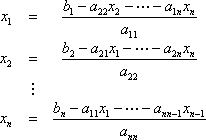

In [ ]:
#importación de librerías 

import numpy as np

#------------------------------

#SISTEMA A RESOLVER: 1.a.
#Edición de datos

M = np.array([[3,-1,1],[3,6,2],[3,3,7]]) #Matriz de coeficientes
v = np.array([1,0,4]) #vector de valores independientes
x1 = 0 #valor de inicio de la iteración
x2 = 0 #valor de inicio de la iteración
x3 = 0 #valor de inicio de la iteración
n = 0 #contador para el número de iteraciones

while True:
  aux = x1 #variable para guardar el valor actual de x11
  x1 = (v[0]-M[0][1]*x2-M[0][2]*x3)/M[0][0] #despeje de x1 para el sistema 3X3
  x2 = (v[1]-M[1][0]*x2-M[1][2]*x3)/M[1][1] #despeje de x2 para el sistema 3X3
  x3 = (v[2]-M[2][0]*x2-M[2][1]*x2)/M[2][2] #despeje de x3 para el sistema 3X3
  e = abs((x1-aux)/x1) #error

  if e<0.0000000001: #condición que evalúa si el error es muy pequeño para romper el ciclo
    break
  n = n + 1

print("Soluciones aproximadas del problema 1.a \n", "x1: ", x1, "x2: ", x2, "x3: ", x3)
print("Número de iteraciones: ", n)
print("Solución 1.a: ", np.linalg.solve(M, v), "\n"*2)

#--------------------------------------------------------------------------------------

#SISTEMA A RESOLVER: 2.a.
#Edición de datos

M = np.array([[3,-1,1],[3,6,2],[3,3,7]]) #Matriz de coeficientes
v = np.array([1,0,4]) #vector de valores independientes
x1 = 0
x2 = 0
x3 = 0
n = 0

while True:
  aux = x1
  x1 = (v[0]-M[0][1]*x2-M[0][2]*x3)/M[0][0]
  x2 = (v[1]-M[1][0]*x2-M[1][2]*x3)/M[1][1]
  x3 = (v[2]-M[2][0]*x2-M[2][1]*x2)/M[2][2]
  e = abs((x1-aux)/x1)

  if e<0.0000000001:
    break
  n = n + 1

print("Soluciones aproximadas del problema 2.a \n", "x1: ", x1, "x2: ", x2, "x3: ", x3)
print("Número de iteraciones: ", n)
print("Solución 2.a: ", np.linalg.solve(M, v))


Soluciones aproximadas del problema 1.a 
 x1:  0.045751633986516826 x2:  -0.15686274509789686 x3:  0.7058823529410544
Número de iteraciones:  18
Solución 1.a:  [ 0.03508772 -0.23684211  0.65789474] 


Soluciones aproximadas del problema 2.a 
 x1:  0.045751633986516826 x2:  -0.15686274509789686 x3:  0.7058823529410544
Número de iteraciones:  18
Solución 2.a:  [ 0.03508772 -0.23684211  0.65789474]


# Luisa Carolina Rodríguez Arciniegas


In [ ]:
print("Ejercicio 1.a")
A = [[3,-1,1],[3,6,2],[3, 3, 7]] #Lista de listas

b = [[1],[0],[4]] #lista

A1 = np.array(A)
b1 = np.array(b)
print(A1)
print(b1)

X_inicio = np.array([[0], [0], [0]]) #vector columna
print(X_inicio)
Metodo_Jacobi(A1,b1,X_inicio, Max_Iter=3, Tol=0.5)

print("\n")
print("Ejercicio 1.b")
A = [[10,-1,0],[-1,10,-2],[0,-2,10]] #Lista de listas

b = [[9],[7],[6]] #lista

A1 = np.array(A)
b1 = np.array(b)
print(A1)
print(b1)

X_inicio = np.array([[0],[0],[0]]) #vector columna
print(X_inicio)
Metodo_Jacobi(A1,b1,X_inicio, Max_Iter=3, Tol=0.5)

print("\n")
print("Ejercicio 1.c")
A = [[10,5,0,0],[5,10,-4,0],[0,-4,8,-1],[0,0,-1,5]] #Lista de listas

b = [[6],[25],[-11],[-11]] #lista

A1 = np.array(A)
b1 = np.array(b)
print(A1)
print(b1)

X_inicio = np.array([[0],[0],[0],[0]]) #vector columna
print(X_inicio)
Metodo_Jacobi(A1,b1,X_inicio, Max_Iter=3, Tol=0.5)

print("\n")
print("Ejercicio 1.d")
A = [[4,1,1,0,1],[-1,-3,1,1,0],[2,1,5,-1,-1],[-1,-1,-1,4,0],[0,2,-1,1,4]] #Lista de listas

b = [[6],[6],[6],[6],[6]] #lista

A1 = np.array(A)
b1 = np.array(b)
print(A1)
print(b1)

X_inicio = np.array([[0],[0],[0],[0],[0]]) #vector columna
print(X_inicio)
Metodo_Jacobi(A1,b1,X_inicio, Max_Iter=3, Tol=0.5)

Ejercicio 1.a
[[ 3 -1  1]
 [ 3  6  2]
 [ 3  3  7]]
[[1]
 [0]
 [4]]
[[0]
 [0]
 [0]]
Iteracion:  1
Vector:  [[0.33333333]
 [0.        ]
 [0.57142857]]
Error:  0.6615449518785621
Iteracion:  2
Vector:  [[ 0.14285714]
 [-0.35714286]
 [ 0.42857143]]
Error:  0.42923229469809393
Sale ciclo while


Ejercicio 1.b
[[10 -1  0]
 [-1 10 -2]
 [ 0 -2 10]]
[[9]
 [7]
 [6]]
[[0]
 [0]
 [0]]
Iteracion:  1
Vector:  [[0.9]
 [0.7]
 [0.6]]
Error:  1.2884098726725126
Iteracion:  2
Vector:  [[0.97]
 [0.91]
 [0.74]]
Error:  0.26191601707417583
Sale ciclo while


Ejercicio 1.c
[[10  5  0  0]
 [ 5 10 -4  0]
 [ 0 -4  8 -1]
 [ 0  0 -1  5]]
[[  6]
 [ 25]
 [-11]
 [-11]]
[[0]
 [0]
 [0]
 [0]]
Iteracion:  1
Vector:  [[ 0.6  ]
 [ 2.5  ]
 [-1.375]
 [-2.2  ]]
Error:  3.652482032810018
Iteracion:  2
Vector:  [[-0.65 ]
 [ 1.65 ]
 [-0.4  ]
 [-2.475]]
Error:  1.8196840385077846
Sale ciclo while


Ejercicio 1.d
[[ 4  1  1  0  1]
 [-1 -3  1  1  0]
 [ 2  1  5 -1 -1]
 [-1 -1 -1  4  0]
 [ 0  2 -1  1  4]]
[[6]
 [6]
 [6]
 [6]
 [6]]
[[

(array([[ 1.325],
        [-1.6  ],
        [ 1.6  ],
        [ 1.675],
        [ 2.425]]), 3, 1.1121488209767612)

In [ ]:
print("Ejercicio 2.a")
A = [[4,1,-1],[-1,3,1],[2,2,5]] #Lista de listas

b = [[5],[-4],[1]] #lista

A1 = np.array(A)
b1 = np.array(b)
print(A1)
print(b1)

X_inicio = np.array([[0],[0],[0]]) #vector columna
print(X_inicio)
Metodo_Jacobi(A1,b1,X_inicio, Max_Iter=3, Tol=0.5)

print("\n")
print("Ejercicio 2.b")
A = [[-2,1,1/2],[1,-2,-1/2],[0,1,2]] #Lista de listas

b = [[4],[-4],[0]] #lista

A1 = np.array(A)
b1 = np.array(b)
print(A1)
print(b1)

X_inicio = np.array([[0],[0],[0]]) #vector columna
print(X_inicio)
Metodo_Jacobi(A1,b1,X_inicio, Max_Iter=3, Tol=0.5)

print("\n")
print("Ejercicio 2.c")
A = [[4,1,-1,1],[1,4,-1,-1],[-1,-1,5,1],[1,-1,1,3]] #Lista de listas

b = [[-2],[-1],[0],[1]] #lista

A1 = np.array(A)
b1 = np.array(b)
print(A1)
print(b1)

X_inicio = np.array([[0],[0],[0],[0]]) #vector columna
print(X_inicio)
Metodo_Jacobi(A1,b1,X_inicio, Max_Iter=3, Tol=0.5)

print("\n")
print("Ejercicio 2.d")
A = [[4,-1,0,-1,0,0],[-1,4,-1,0,-1,0],[0,-1,4,0,0,-1],[-1,0,0,4,-1,0],[0,-1,0,-1,4,-1],[0,0,-1,0,-1,4]] #Lista de listas

b = [[0],[5],[0],[6],[-2],[6]] #lista

A1 = np.array(A)
b1 = np.array(b)
print(A1)
print(b1)

X_inicio = np.array([[0],[0],[0],[0],[0],[0]]) #vector columna
print(X_inicio)
Metodo_Jacobi(A1,b1,X_inicio, Max_Iter=3, Tol=0.5)

Ejercicio 2.a
[[ 4  1 -1]
 [-1  3  1]
 [ 2  2  5]]
[[ 5]
 [-4]
 [ 1]]
[[0]
 [0]
 [0]]
Iteracion:  1
Vector:  [[ 1.25      ]
 [-1.33333333]
 [ 0.2       ]]
Error:  1.8385531751292312
Iteracion:  2
Vector:  [[ 1.63333333]
 [-0.98333333]
 [ 0.23333333]]
Error:  0.5201495511442411
Sale ciclo while


Ejercicio 2.b
[[-2.   1.   0.5]
 [ 1.  -2.  -0.5]
 [ 0.   1.   2. ]]
[[ 4]
 [-4]
 [ 0]]
[[0]
 [0]
 [0]]
Iteracion:  1
Vector:  [[-2.]
 [ 2.]
 [ 0.]]
Error:  2.8284271247461903
Iteracion:  2
Vector:  [[-1.]
 [ 1.]
 [-1.]]
Error:  1.7320508075688772
Sale ciclo while


Ejercicio 2.c
[[ 4  1 -1  1]
 [ 1  4 -1 -1]
 [-1 -1  5  1]
 [ 1 -1  1  3]]
[[-2]
 [-1]
 [ 0]
 [ 1]]
[[0]
 [0]
 [0]
 [0]]
Iteracion:  1
Vector:  [[-0.5       ]
 [-0.25      ]
 [ 0.        ]
 [ 0.33333333]]
Error:  0.6508541396588878
Iteracion:  2
Vector:  [[-0.52083333]
 [-0.04166667]
 [-0.21666667]
 [ 0.41666667]]
Error:  0.3126110913650449
Sale ciclo while


Ejercicio 2.d
[[ 4 -1  0 -1  0  0]
 [-1  4 -1  0 -1  0]
 [ 0 -1  4  0  0 -

(array([[0.6875],
        [1.125 ],
        [0.6875],
        [1.375 ],
        [0.5625],
        [1.375 ]]), 3, 1.4563975247163805)

In [ ]:
print("Ejercicio 3.1.a")
import numpy as np
print ('Método de Gauss-Seidel')
def Metodo_Gauss_Sediel(A, b, max_iteraciones, tolerancia=0.0001):
  error=[]
  numFilas, numCol = A.shape 
  c_interaciones = 0 # contador de iteraciones 
  x = np.zeros((numFilas)) # x es vector solución, crea vector de ceros
  while c_interaciones < max_iteraciones:
    sum=0
    c_interaciones = c_interaciones + 1
    print("Iteración: " + str(c_interaciones))
    # i recorre filas 
    for i in range(0,numFilas):
        sum=0
        # j recorre columnas
        for j in range(0,numCol):
            if (j != i):
                sum = sum + A[i,j] * x[j] # Suma de numerador cuando se despeja x1             
        x[i] = (b[i]-sum)/A[i,i] # Despeje de x1, x2 y x3
        print("x["+str(i)+"]: "+str(x[i]))
    del error[:] # Borrar contenido de la lista de errores

    # Comprobación
    for i in range(0,numFilas):
        sum=0
        for j in range(0,numCol):
            sum = sum + A[i,j] * x[j]
        comprobacion[i] = sum
        diferencia = abs(comprobacion[i]-b[i]) #abs es valor absoluto 
        error.append(diferencia)
        print("Error en x[",i,"]= ", error[i])
    print("--------------------------------------")

    if all( i <= tolerancia for i in error) == True: # Si todos los elementos del error son menores o iguales a la tolerancia, lanza true y se sale 
      break

A = [[3,-1,1],[3,6,2],[3,3,7]] # Lista de listas
matriz = np.array(A) # m filas, n columnas, se crea una matriz de ceros
numFilas, numCol = matriz.shape # shape es tamaño en inglés 

B = [1,0,4]
vector = np.array(B) # Se crea un vector de ceros de tamaño n 
comprobacion = np.zeros((numFilas))

tolerancia = 0.0001
max_iteraciones = 2

Metodo_Gauss_Sediel(matriz, vector, max_iteraciones, tolerancia)

print("\n")
print("Ejercicio 3.1.b")
import numpy as np
print ('Método de Gauss-Seidel')

A = [[10,-1,0],[-1,10,-2],[0,-2,10]] # Lista de listas
matriz = np.array(A) # m filas, n columnas, se crea una matriz de ceros
numFilas, numCol = matriz.shape # shape es tamaño en inglés 

B = [9,7,6]
vector = np.array(B) # Se crea un vector de ceros de tamaño n 
comprobacion = np.zeros((numFilas))

tolerancia = 0.0001
max_iteraciones = 2

Metodo_Gauss_Sediel(matriz, vector, max_iteraciones, tolerancia)

print("\n")
print("Ejercicio 3.1.c")
import numpy as np
print ('Método de Gauss-Seidel')

A = [[10,5,0,0],[5,10,-4,0],[0,-4,8,-1],[0,0,-1,5]] # Lista de listas
matriz = np.array(A) # m filas, n columnas, se crea una matriz de ceros
numFilas, numCol = matriz.shape # shape es tamaño en inglés 

B = [6,25,-11,-11]
vector = np.array(B) # Se crea un vector de ceros de tamaño n 
comprobacion = np.zeros((numFilas))

tolerancia = 0.0001
max_iteraciones = 2

Metodo_Gauss_Sediel(matriz, vector, max_iteraciones, tolerancia)

print("\n")
print("Ejercicio 3.1.d")
import numpy as np
print ('Método de Gauss-Seidel')

A = [[4,1,1,0,1],[-1,-3,1,1,0],[2,1,5,-1,-1],[-1,-1,-1,4,0],[0,2,-1,1,4]] # Lista de listas
matriz = np.array(A) # m filas, n columnas, se crea una matriz de ceros
numFilas, numCol = matriz.shape # shape es tamaño en inglés 

B = [6,6,6,6,6,6]
vector = np.array(B) # Se crea un vector de ceros de tamaño n 
comprobacion = np.zeros((numFilas))

tolerancia = 0.0001
max_iteraciones = 2

Metodo_Gauss_Sediel(matriz, vector, max_iteraciones, tolerancia)



Ejercicio 3.1.a
Método de Gauss-Seidel
Iteración: 1
x[0]: 0.3333333333333333
x[1]: -0.16666666666666666
x[2]: 0.5
Error en x[ 0 ]=  0.6666666666666667
Error en x[ 1 ]=  1.0
Error en x[ 2 ]=  0.0
--------------------------------------
Iteración: 2
x[0]: 0.11111111111111112
x[1]: -0.22222222222222224
x[2]: 0.619047619047619
Error en x[ 0 ]=  0.17460317460317443
Error en x[ 1 ]=  0.23809523809523792
Error en x[ 2 ]=  4.440892098500626e-16
--------------------------------------


Ejercicio 3.1.b
Método de Gauss-Seidel
Iteración: 1
x[0]: 0.9
x[1]: 0.79
x[2]: 0.758
Error en x[ 0 ]=  0.7899999999999991
Error en x[ 1 ]=  1.516
Error en x[ 2 ]=  0.0
--------------------------------------
Iteración: 2
x[0]: 0.9789999999999999
x[1]: 0.9495000000000001
x[2]: 0.7899
Error en x[ 0 ]=  0.1595000000000013
Error en x[ 1 ]=  0.06379999999999875
Error en x[ 2 ]=  8.881784197001252e-16
--------------------------------------


Ejercicio 3.1.c
Método de Gauss-Seidel
Iteración: 1
x[0]: 0.6
x[1]: 2.2
x[2]: -0

In [ ]:
print("Ejercicio 4.2.a")
import numpy as np
print ('Método de Gauss-Seidel')
def Metodo_Gauss_Sediel(A, b, max_iteraciones, tolerancia=0.0001):
  error=[]
  numFilas, numCol = A.shape
  c_interaciones = 0 # contador de iteraciones 
  x = np.zeros((numFilas)) # x es vector solución, crea vector de ceros
  while c_interaciones < max_iteraciones:
    sum = 0
    c_interaciones = c_interaciones + 1
    print("Iteración: " + str(c_interaciones))
    # i recorre filas 
    for i in range(0,numFilas):
        sum=0
        # j recorre columnas
        for j in range(0, numCol):
            if (j != i):
                sum = sum + A[i,j] * x[j] # Suma de numerador cuando se despeja x1             
        x[i] = (b[i]-sum)/A[i,i] # Despeje de x1, x2 y x3
        print("x["+str(i)+"]: "+str(x[i]))
    del error[:] # Borrar contenido de la lista de errores

    # Comprobación
    for i in range(0,numFilas):
        sum=0
        for j in range(0,numCol):
            sum = sum + A[i,j] * x[j]
        comprobacion[i] = sum
        diferencia = abs(comprobacion[i]-b[i])
        error.append(diferencia)
        print("Error en x[",i,"]= ", error[i])
    print("--------------------------------------")

    if all( i <= tolerancia for i in error) == True: # Si todos los elementos del error son menores o iguales a la tolerancia, lanza true y se sale 
      break

A = [[4,1,-1],[-1,3,1],[2,2,5]] # Lista de listas
matriz = np.array(A) # m filas, n columnas, se crea una matriz de ceros
numFilas, numCol = matriz.shape # shape es tamaño en inglés 

B = [5,-4, 1]
vector = np.array(B) # Se crea un vector de ceros de tamaño n 
comprobacion = np.zeros((numFilas))

tolerancia = 0.0001
max_iteraciones = 2

Metodo_Gauss_Sediel(matriz, vector, max_iteraciones, tolerancia)

print("\n")
print("Ejercicio 4.2.b")
import numpy as np
print ('Método de Gauss-Seidel')

A = [[-2,1,1/2],[1,-2,-1/2],[0,1,2]] # Lista de listas
matriz = np.array(A) # m filas, n columnas, se crea una matriz de ceros
numFilas, numCol = matriz.shape # shape es tamaño en inglés 

B = [4,-4, 0]
vector = np.array(B) # Se crea un vector de ceros de tamaño n 
comprobacion = np.zeros((numFilas))

tolerancia = 0.0001
max_iteraciones = 2

Metodo_Gauss_Sediel(matriz, vector, max_iteraciones, tolerancia)

print("\n")
print("Ejercicio 4.2.c")
import numpy as np
print ('Método de Gauss-Seidel')

A = [[4,1,-1,1],[1,4,-1,-1],[-1,-1,5,1],[1,-1,1,3]] # Lista de listas
matriz = np.array(A) # m filas, n columnas, se crea una matriz de ceros
numFilas, numCol = matriz.shape # shape es tamaño en inglés 

B = [-2,-1,0,1]
vector = np.array(B) # Se crea un vector de ceros de tamaño n 
comprobacion = np.zeros((numFilas))

tolerancia = 0.0001
max_iteraciones = 2

Metodo_Gauss_Sediel(matriz, vector, max_iteraciones, tolerancia)

print("\n")
print("Ejercicio 4.2.d")
import numpy as np
print ('Método de Gauss-Seidel')

A = [[4,-1,0,-1,0,0],[-1,4,-1,0,-1,0],[0,-1,4,0,0,-1],[-1,0,0,4,-1,0],[0,-1,0,-1,4,-1],[0,0,-1,0,-1,4]] # Lista de listas
matriz = np.array(A) # m filas, n columnas, se crea una matriz de ceros
numFilas, numCol = matriz.shape # shape es tamaño en inglés 

B = [0,5,0,6,-2,6]
vector = np.array(B) # Se crea un vector de ceros de tamaño n 
comprobacion = np.zeros((numFilas))

tolerancia = 0.0001
max_iteraciones = 2

Metodo_Gauss_Sediel(matriz, vector, max_iteraciones, tolerancia)

Ejercicio 4.2.a
Método de Gauss-Seidel
Iteración: 1
x[0]: 1.25
x[1]: -0.9166666666666666
x[2]: 0.06666666666666665
Error en x[ 0 ]=  0.9833333333333334
Error en x[ 1 ]=  0.06666666666666643
Error en x[ 2 ]=  0.0
--------------------------------------
Iteración: 2
x[0]: 1.4958333333333333
x[1]: -0.8569444444444444
x[2]: -0.05555555555555558
Error en x[ 0 ]=  0.18194444444444446
Error en x[ 1 ]=  0.12222222222222179
Error en x[ 2 ]=  0.0
--------------------------------------


Ejercicio 4.2.b
Método de Gauss-Seidel
Iteración: 1
x[0]: -2.0
x[1]: 1.0
x[2]: -0.5
Error en x[ 0 ]=  0.75
Error en x[ 1 ]=  0.25
Error en x[ 2 ]=  0.0
--------------------------------------
Iteración: 2
x[0]: -1.625
x[1]: 1.3125
x[2]: -0.65625
Error en x[ 0 ]=  0.234375
Error en x[ 1 ]=  0.078125
Error en x[ 2 ]=  0.0
--------------------------------------


Ejercicio 4.2.c
Método de Gauss-Seidel
Iteración: 1
x[0]: -0.5
x[1]: -0.125
x[2]: -0.125
x[3]: 0.5
Error en x[ 0 ]=  0.5
Error en x[ 1 ]=  0.375
Error en x[ 

# Camilo Andres Moreno Rojas

Método de Jacobi

In [ ]:
def norm(x):
    s = 0.0
    n = len (x)
    for i in range (0,n):
        s = s + x[i]*x[i]
    return s

def jacobi(A,b,x,mi):
    while(mi>0):
        for i in range (0,len(A)):
            sigma = 0
            for j in range (0,len(A)):
                if(i!=j):
                    sigma = sigma + (A[i][j]*x[j])
                    x[i] = (b[i] - sigma)/A[i][i]
        mi = mi -1
    return x

A = [[10,5,0,0],[5,10,-4,0],[0,-4, 8, -1],[0, 0, -1, 5]] #Lista de listas

b = [6,25,-11,-11] #lista
x=[0.0]*len(b)
print (jacobi(A, b, x, 10000))
                    

[-0.7976470588235294, 2.795294117647059, -0.2588235294117647, -2.2517647058823527]


# Santiago Avendaño Restrepo

Método de Jacobi

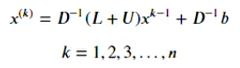

In [ ]:
import numpy as np

def jacobi(A,b,x0,tol,n):    #defino la función jacobi
  """Esta función se encarga de resolver un sistema de ecuaciones lineales por medio del
      metodo de jacobi utilizando la siguiente notación:
      A: Matriz que representa el sistema de ecuaciones a solucionar
      b: Vector de constantes del sistema de ecuaciones
      x: Vector de incognitas
      D: Diagonal de la matriz A
      L: Matriz triangular inferior de A
      U: Matriz triangular superior de A

      Return.
      Retorna el valor de las incognitas en la iteración correspondiente
  """
  D=np.diag(np.diag(A))    #utilizo esta función para sacar la diagonal de A
  LU=A-D                   #Al restar la diagonal a la matriz A, obtengo la suma de la triangular superior e inferior LU(L+U)
  x=x0
  for i in range (n):        #utilizo un ciclo for el cual va hasta un numero de iteraciones n
    D_inv=np.linalg.inv(D)     #Matriz inversa de D(diagonal)
    xtemp=x
    x=np.dot(D_inv,np.dot(-LU,x))+np.dot(D_inv,b)
    print("iteración",i,":x=",x)
    if np.linalg.norm(x-xtemp)<tol:   #cuando la norma del vector x menos el nuevo vector obtenido sea menor a la tolerancia establecida, salgo del ciclo for
       return x
  return x

#Solución de ejercicios
print("Solución ejercicio 1_a)")
A=np.array([[3,-1,1],[3,6,2],[3,3,7]])    #matriz A, del sistema de ecuaciones a solucionar
b=([1,0,4])               #Vector de solución de valores independientes del sistema 

x0=np.zeros(3)         #Vector de incognitas, en este caso se crea un vector de ceros para la primera iteración
tol=0.001              #Tolerancia, margen de error
n=500                      #numero maximo de iteraciones
x=jacobi(A,b,x0,tol,n)
print("Solución ejercicio 1_b)")
A=np.array([[10,-1,0],[-1,10,-2],[0,-2,10]])    
b=([9,7,6])   
       
x0=np.zeros(3)        
tol=0.001             
n=500                      
x=jacobi(A,b,x0,tol,n)
print("Solución ejercicio 1_c)")
A=np.array([[10,5,0,0],[5,10,-4,0],[0,-4,8,-4],[0,0,-1,5]])    
b=([6,25,-11,-11])                

x0=np.zeros(4)         
tol=0.001              
n=500                      
x=jacobi(A,b,x0,tol,n)
print("Solución ejercicio 1_d)")
A=np.array([[4,1,1,0,1],[-1,-3,1,1,0],[2,1,5,-1,-1],[-1,-1,-1,4,0],[0,2,-1,1,4]])    
b=([6,6,6,6,6])                

x0=np.zeros(5)         
tol=0.001              
n=500                      
x=jacobi(A,b,x0,tol,n)
print("Solución ejercicio 2_a)")
A=np.array([[4,1,-1],[-1,3,1],[2,2,5]])    
b=([5,-4,1])               

x0=np.zeros(3)        
tol=0.001             
n=500                      
x=jacobi(A,b,x0,tol,n)
print("Solución ejercicio 2_b)")
A=np.array([[-2,1,1/2],[1,-2,-1/2],[0,1,2]])    
b=([4,-4,0])               

x0=np.zeros(3)        
tol=0.001             
n=500                      
x=jacobi(A,b,x0,tol,n)
print("Solución ejercicio 2_c)")
A=np.array([[4,1,-1,1],[1,4,-1,-1],[-1,-1,5,1],[1,-1,1,3]])    
b=([-2,-1,0,1])                

x0=np.zeros(4)         
tol=0.001              
n=500                      
x=jacobi(A,b,x0,tol,n)
print("Solución ejercicio 2_d)")
A=np.array([[4,-1,0,-1,0,0],[-1,4,-1,0,-1,0],[0,-1,4,0,0,-1],[-1,0,0,4,-1,0],[0,-1,0,-1,4,-1],[0,0,-1,0,-1,4]])    
b=([0,5,0,6,-2,6])                

x0=np.zeros(6)         
tol=0.001              
n=500                      
x=jacobi(A,b,x0,tol,n)

Método de Gauss-Seidel

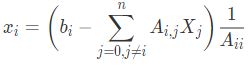

In [ ]:
import numpy as np

def seidel(A,B,X0,tolera,iteramax):
  """Esta función se encarga de resolver un sistema de ecuaciones lineales por medio del
     metodo de Gauss-Seidel utilizando la siguiente notación:
      A: Matriz que representa el sistema de ecuaciones a solucionar
      B: Vector de constantes del sistema de ecuaciones
      X: Vector de incognitas
  """    
  tamano = np.shape(A)            #Tamaño de la matriz
  n = tamano[0]                    #numero de filas
  m = tamano[1]                   #numero de columnas
  #  valores iniciales
  X = np.copy(X0)               #Se empieza con un vector de ceros para la primera iteración
  diferencia = np.ones(n, dtype=float)    #se inicia con un vector de unos, la diferencia resta el valor de incognitas anterior 
                                          #con el nuevo valor obtenido para así ir acercandose a la tolerancia establecida
  errado = 2*tolera                          #parametro el cual va cambiando en cada ciclo, hasta llegar a un valor menor o igual a la tolerancia

  itera = 0                                    #contador de iteraciones
  while not(errado<=tolera or itera>iteramax):
      # por fila
      for i in range(0,n,1):             #ciclo que recorre las filas
          # por columna
          suma = 0 
          for j in range(0,m,1):             #ciclo que recorre las columnas
              # excepto diagonal de A
              if (i!=j):                  #se debe de cumplir que i sea diferente a j como lo indica la formula
                  suma = suma-A[i,j]*X[j]   #sumatoria
      # para calcular el margen de error:    
          nuevo = (B[i]+suma)/A[i,i]            
          diferencia[i] = np.abs(nuevo-X[i])
          X[i] = nuevo
      errado = np.max(diferencia)
      itera = itera + 1
  print(X)

# Solución Ejercicios
print("Solución ejercicio 1_a)")
A = np.array([[3,-1,1],[3,6,2],[3,3,7]])
B = np.array([1,0,4])
X0  = np.zeros(3)                              #Vector de incognitas, en este caso se crea un vector de ceros para la primera iteración
tolera = 0.00001
iteramax = 100
x=seidel(A,B,X0,tolera,iteramax)
print("Solución ejercicio 1_b)")
A=np.array([[10,-1,0],[-1,10,-2],[0,-2,10]])    
B=([9,7,6])   
       
X0=np.zeros(3)        
tolera=0.001             
iteramax=500                      
x=seidel(A,B,X0,tolera,iteramax)
print("Solución ejercicio 1_c)")
A=np.array([[10,5,0,0],[5,10,-4,0],[0,-4,8,-4],[0,0,-1,5]])    
B=([6,25,-11,-11])                

X0=np.zeros(4)         
tolera=0.001              
iteramax=500                      
x=seidel(A,B,X0,tolera,iteramax)
print("Solución ejercicio 1_d)")
A=np.array([[4,1,1,0,1],[-1,-3,1,1,0],[2,1,5,-1,-1],[-1,-1,-1,4,0],[0,2,-1,1,4]])    
B=([6,6,6,6,6])                

X0=np.zeros(5)         
tolera=0.001              
iteramax=500                      
x=seidel(A,B,X0,tolera,iteramax)
print("Solución ejercicio 2_a)")
A=np.array([[4,1,-1],[-1,3,1],[2,2,5]])    
B=([5,-4,1])               

X0=np.zeros(3)        
tolera=0.001             
iteramax=500                      
x=seidel(A,B,X0,tolera,iteramax)
print("Solución ejercicio 2_b)")
A=np.array([[-2,1,1/2],[1,-2,-1/2],[0,1,2]])    
B=([4,-4,0])               

X0=np.zeros(3)        
tolera=0.001             
iteramax=500                      
x=seidel(A,B,X0,tolera,iteramax)
print("Solución ejercicio 2_c)")
A=np.array([[4,1,-1,1],[1,4,-1,-1],[-1,-1,5,1],[1,-1,1,3]])    
B=([-2,-1,0,1])                

X0=np.zeros(4)         
tolera=0.001              
iteramax=500                      
x=seidel(A,B,X0,tolera,iteramax)
print("Solución ejercicio 2_d)")
A=np.array([[4,-1,0,-1,0,0],[-1,4,-1,0,-1,0],[0,-1,4,0,0,-1],[-1,0,0,4,-1,0],[0,-1,0,-1,4,-1],[0,0,-1,0,-1,4]])    
B=([0,5,0,6,-2,6])                

X0=np.zeros(6)         
tolera=0.001              
iteramax=500                      
x=seidel(A,B,X0,tolera,iteramax)

Solución ejercicio 1_a)
[ 0.03508864 -0.23684191  0.65789426]
Solución ejercicio 1_b)
[0.9957475  0.95787375 0.79157475]
Solución ejercicio 1_c)
[-0.44270205  2.08480731 -1.59173227 -2.51834645]
Solución ejercicio 1_d)
[ 0.78668253 -1.00271872  1.86628339  1.9125618   1.98978976]
Solución ejercicio 2_a)
[ 1.44781635 -0.8358173  -0.04479962]
Solución ejercicio 2_b)
[-1.4547042   1.45441316 -0.72720658]
Solución ejercicio 2_c)
[-0.75317626  0.04101049 -0.28070469  0.69163048]
Solución ejercicio 2_d)
[0.9995427  1.99960967 0.99983341 1.99972399 0.99976441 1.99989946]


# Fabián Esteban Alzate Bernal 

In [ ]:
import numpy as np
import matplotlib.pylab as plt

#funcion una Iteracion Jacobi
def Iter_Jacobi(AA, bb, X0):
  """Funcion de una iteracion de Jacobi
     sistema AA x = bb
     AA: matriz (np.array(n,n))
     bb: vector (np.array(n,1))
     X0: vector )np.array(n,1))
  """
  X_new = np.zeros(X0.shape)
  N = len(bb)
  for i in range(N):
    Tsum = 0
    for j in range(N):
      if i!=j:
        Tsum = Tsum - AA[i,j]*X0[j]
    Tsum = (Tsum + bb[i])/AA[i,i]
    X_new[i] = Tsum
  return X_new

###Esquema Iteracion 
def Metodo_Jacobi(AA,bb,X0, Max_Iter=10, Tol=0.0001):
  """Metodo de Jacobi para solucion iterativa de
     AA x = bb
     
  """
  X_old = X0
  C_iter = 1 #contador iteraciones
  C_error = 1 #error inicial
  while C_iter<Max_Iter and C_error>Tol:
    X_new = Iter_Jacobi(AA,bb, X_old)
    print("Iteracion: ",C_iter)
    print("Vector: ",X_new)

    ##incremento contador
    C_iter += 1
    #Nuevo Error
    C_error = np.linalg.norm(X_new - X_old)
    print("Error: ",C_error)

    #reiniciar
    X_old = X_new
  print("Sale ciclo while")
  return X_new, C_iter, C_error

#Ejercicio 1a
A1a = np.array([[3,-1,1],[3,6,2],[3,3, 7]]) #Matriz A de ejercicio 1.a.
b1a = np.array([[1],[0],[4]]) #Vector columna b de ejercicio 1.a.
X_inicio1a = np.array([[0], [0], [0]]) #Vector x**(0)=0        
Metodo_Jacobi(A1a,b1a,X_inicio1a, Max_Iter=3)

#Ejercicio 1b
A1b = np.array([[10,-1,0],[-1,10,-2],[0,-2,10]]) #Matriz A de ejercicio 1.b.
b1b = np.array([[9],[7],[6]]) #Vector columna b de ejercicio 1.b.
X_inicio1b = np.array([[0], [0], [0]]) #Vector x**(0)=0        
Metodo_Jacobi(A1b,b1b,X_inicio1b, Max_Iter=3)

#Ejercicio 1c
A1c = np.array([[10,5,0,0],[5,10,-4,0],[0,-4,8,-1],[0,0,-1,5]]) #Matriz A de ejercicio 1.c.
b1c = np.array([[6],[25],[-11],[-11]]) #Vector columna b de ejercicio 1.c.
X_inicio1c = np.array([[0], [0], [0],[0]]) #Vector x**(0)=0        
Metodo_Jacobi(A1c,b1c,X_inicio1c, Max_Iter=3)

#Ejercicio 1d
A1d = np.array([[4,1,1,0,1],[-1,-3,1,1,0],[2,1,5,-1,-1],[-1,-1,-1,4,0],[0,2,-1,1,4]]) #Matriz A de ejercicio 1.d.
b1d = np.array([[6],[6],[6],[6],[6]]) #Vector columna b de ejercicio 1.d.
X_inicio1d = np.array([[0], [0], [0],[0],[0]]) #Vector x**(0)=0        
Metodo_Jacobi(A1d,b1d,X_inicio1d, Max_Iter=3)

#Ejercicio 2a
A2a = np.array([[4,1,-1],[-1,3,1],[2,2,5]]) #Matriz A de ejercicio 2.a.
b2a = np.array([[5],[-4],[1]]) #Vector columna b de ejercicio 2.a.
X_inicio2a = np.array([[0], [0], [0]]) #Vector x**(0)=0        
Metodo_Jacobi(A2a,b2a,X_inicio2a, Max_Iter=3)

#Ejercicio 2b
A2b = np.array([[-2,1,1/2],[1,-2,-1/2],[0,1,2]]) #Matriz A de ejercicio 2.b.
b2b = np.array([[4],[-4],[0]]) #Vector columna b de ejercicio 2.b.
X_inicio2b = np.array([[4],[-4],[0]]) #Vector x**(0)=0        
Metodo_Jacobi(A2b,b2b,X_inicio2b, Max_Iter=3)

#Ejercicio 2c
A2c= np.array([[4,1,-1,1],[1,4,-1,-1],[-1,-1,5,1],[1,-1,1,3]]) #Matriz A de ejercicio 2.c.
b2c= np.array([[-2],[-1],[0],[1]]) #Vector columna b de ejercicio 2.c.
X_inicio2c= np.array([[0], [0], [0],[0]]) #Vector x**(0)=0        
Metodo_Jacobi(A2c,b2c,X_inicio2c,Max_Iter=3)

#Ejercicio 2d
A2d = np.array([[4,-1,0,-1,0,0],[-1,4,-1,0,-1,0],[0,-1,4,0,0,-1],[-1,0,0,4,-1,0],[0,-1,0,-1,4,-1],[0,0,-1,0,-1,4]]) #Matriz A de ejercicio 2.d.
b2d = np.array([[0],[5],[0],[6],[-2],[6]]) #Vector columna b de ejercicio 2.d.
X_inicio2d = np.array([[0], [0], [0],[0],[0],[0]]) #Vector x**(0)=0        
Metodo_Jacobi(A2d,b2d,X_inicio2d, Max_Iter=3)

Iteracion:  1
Vector:  [[0.33333333]
 [0.        ]
 [0.57142857]]
Error:  0.6615449518785621
Iteracion:  2
Vector:  [[ 0.14285714]
 [-0.35714286]
 [ 0.42857143]]
Error:  0.42923229469809393
Sale ciclo while
Iteracion:  1
Vector:  [[0.9]
 [0.7]
 [0.6]]
Error:  1.2884098726725126
Iteracion:  2
Vector:  [[0.97]
 [0.91]
 [0.74]]
Error:  0.26191601707417583
Sale ciclo while
Iteracion:  1
Vector:  [[ 0.6  ]
 [ 2.5  ]
 [-1.375]
 [-2.2  ]]
Error:  3.652482032810018
Iteracion:  2
Vector:  [[-0.65 ]
 [ 1.65 ]
 [-0.4  ]
 [-2.475]]
Error:  1.8196840385077846
Sale ciclo while
Iteracion:  1
Vector:  [[ 1.5]
 [-2. ]
 [ 1.2]
 [ 1.5]
 [ 1.5]]
Error:  3.491418050019218
Iteracion:  2
Vector:  [[ 1.325]
 [-1.6  ]
 [ 1.6  ]
 [ 1.675]
 [ 2.425]]
Error:  1.1121488209767612
Sale ciclo while
Iteracion:  1
Vector:  [[ 1.25      ]
 [-1.33333333]
 [ 0.2       ]]
Error:  1.8385531751292312
Iteracion:  2
Vector:  [[ 1.63333333]
 [-0.98333333]
 [ 0.23333333]]
Error:  0.5201495511442411
Sale ciclo while
Iteracion:  1

(array([[0.6875],
        [1.125 ],
        [0.6875],
        [1.375 ],
        [0.5625],
        [1.375 ]]), 3, 1.4563975247163805)

# Camilo Anama


In [ ]:
def jacobi(A,B,x0,n=50):
  D = np.diag(np.diag(A))
  LU = A - D
  X = x0
  
  for i in range(n):
    D_inv = np.linalg.inv(D)
    xTemp = X
    X= np.dot(D_inv, np.dot(-(LU),X)+B)
    print("paso: ", i, "- X:", X )
  return X


A = np.array([[4,1,-1],[-1,3,1],[2,2,5]])
B = np.array([[5],[-4],[1]])

x0 = np.random.rand(3)
X = jacobi(A,B,x0)
print("X:", X)

paso:  0 - X: [[ 1.16462505  1.34334948  0.79469739]
 [-1.4471666  -1.20886736 -1.94040348]
 [ 0.13170004  0.27467958 -0.16424209]]
paso:  1 - X: [[ 1.64471666  1.62088674  1.69404035]
 [-0.989025   -0.97711003 -1.01368684]
 [ 0.31301662  0.14620715  0.65828244]]
paso:  2 - X: [[ 1.5755104   1.5308293   1.66799232]
 [-0.88943332 -0.84177347 -0.9880807 ]
 [-0.06227667 -0.05751068 -0.0721414 ]]
paso:  3 - X: [[ 1.45678916  1.4460657   1.47898482]
 [-0.78740431 -0.80388667 -0.75328876]
 [-0.07443083 -0.07562233 -0.07196465]]
paso:  4 - X: [[ 1.42824337  1.43206609  1.42033103]
 [-0.82292667 -0.82610399 -0.81635018]
 [-0.06775394 -0.05687161 -0.09027843]]
paso:  5 - X: [[ 1.43879318  1.4423081   1.43151794]
 [-0.83466756 -0.83702077 -0.82979685]
 [-0.04212668 -0.04238484 -0.04159234]]
paso:  6 - X: [[ 1.44813522  1.44865898  1.44705113]
 [-0.83969338 -0.83843569 -0.84229657]
 [-0.04165025 -0.04211493 -0.04068844]]
paso:  7 - X: [[ 1.44951078  1.44908019  1.45040203]
 [-0.83673818 -0.836408

# Juan pablo montes correa 


In [ ]:
import copy
import numpy as np
import math

a = input("Introduzca el número mu de la variable independiente X y el número nu de la ecuación:")
mu, nu = [int(i) for i in a.split(" ")]
b = input("Ingrese la precisión de error requerida e:")
e = float(b)
print(str(mu) + "  " + str(nu)+" "+str(e))

L, D, U = [], [], []  # Inicializar la matriz LDU
for p in range(nu):
    L.append([]), D.append([]), U.append([])
    for q in range(mu):
        x_in = float(input("Introduzca el coeficiente en la fila% dy la columna% d:" % (p + 1, q + 1)))
        if p < q:
            L[p].append(x_in), D[p].append(0), U[p].append(0)
        elif p == q:
            L[p].append(0), D[p].append(x_in), U[p].append(0)
        else:
            L[p].append(0), D[p].append(0), U[p].append(x_in)
L, D, U = np.array(L), np.array(D), np.array(U)

X_Current = []  # Variable independiente x matriz
for q in range(mu):
    x_in = float(input("Introduzca el valor inicial de X% d:" %q))
    X_Current.append(x_in)
X_Current = np.array(X_Current).T  # Transponer el vector de fila X a un vector de columna para facilitar el cálculo de la matriz subsiguiente;

b_Const = []  # Matriz y variable dependiente
for p in range(nu):
    y_in = float(input("Introduzca el valor Y de la ecuación% d:" % (p + 1)))
    b_Const.append(y_in)
b_Const = np.array(b_Const).T  # Transponer el vector de fila X a un vector de columna para facilitar el cálculo de la matriz subsiguiente;

L_U = copy.deepcopy(L)
for p in range(nu):
    for q in range(mu):
        L_U[p][q] = L[p][q]+U[p][q]  # Suma L y U por fila y suma las posiciones correspondientes
        
G1 = np.dot(-np.linalg.inv(D), L_U)  # np.linalg.inv (D) Encuentre la inversa de la matriz
d1 = np.dot(np.linalg.inv(D), b_Const)

# x^(k+1) = G1*x^(k) + d1
X_New = copy.deepcopy(X_Current)  # Importar la biblioteca de copias, copia profunda X_Current como inicialización de X_New;

# Iteración de Jacobi
epoch = 0  # Número de iteraciones
while 1:
    flag = 0  # Marca de precisión de error, cuente el número de x que cumplen con los requisitos de precisión, cuando todos los resultados de x iteraciones en la misma época de X_New alcanzan la precisión, salida X_New
    X_Current = X_New
    X_New = np.dot(G1, X_Current)
    for p in range(mu):
        X_New[p] = X_New[p] + d1[p]
        if math.fabs(X_New[p]-X_Current[p]) < e:
            flag += 1
    epoch += 1
    if epoch > 50:  # De acuerdo con las características de convergencia de la iteración de Jacobi, establezca el límite superior de iteración en 50 veces;
        print("¡La iteración de Jacobi no converge!")
        epoch = 0
        break

    if flag == mu:
        print("Los resultados de la iteración de Jacobi son los siguientes:")
        print(X_New)
        break

Introduzca el número mu de la variable independiente X y el número nu de la ecuación:3 3
Ingrese la precisión de error requerida e:0.001
3  3 0.001
Introduzca el coeficiente en la fila 1y la columna 1:10
Introduzca el coeficiente en la fila 1y la columna 2:-1
Introduzca el coeficiente en la fila 1y la columna 3:0
Introduzca el coeficiente en la fila 2y la columna 1:-1
Introduzca el coeficiente en la fila 2y la columna 2:10
Introduzca el coeficiente en la fila 2y la columna 3:-2
Introduzca el coeficiente en la fila 3y la columna 1:0
Introduzca el coeficiente en la fila 3y la columna 2:-2
Introduzca el coeficiente en la fila 3y la columna 3:10
Introduzca el valor inicial de X 0:0
Introduzca el valor inicial de X 1:0
Introduzca el valor inicial de X 2:0
Introduzca el valor Y de la ecuación 1:9
Introduzca el valor Y de la ecuación 2:7
Introduzca el valor Y de la ecuación 3:6
Los resultados de la iteración de Jacobi son los siguientes:
[0.995725 0.957775 0.79145 ]


# Resultados y conclusiones

**Conclusiones:**



**Resultados:**

**Referencias:**

[Numerical Computing with MATLAB
Copyright 2004, Cleve Moler. Introd.](https://www.mathworks.com/content/dam/mathworks/mathworks-dot-com/moler/intro.pdf)

[Burde & Faires](https://udeaeduco.sharepoint.com/:b:/s/MtodosNumricos_2022-1/EQd1_32TgMhCh8MBU0FqxpIBSIjxSMEJKAcVIVyvYZHSng?e=nrWw8z)

[Chapra & Canale](https://udeaeduco.sharepoint.com/:b:/s/MtodosNumricos_2022-1/EZgs5MpMDKtLpAZlwGEmn9oB3FvpAGncvlnWPcZ9wRNhIg?e=fPcsyf)

[Kiusallas- NM with python ](https://udeaeduco.sharepoint.com/:b:/s/MtodosNumricos_2022-1/ESazTK0AHE5Pta-KrZ69VbUBds8rV7zE3pGtjjHiAO7-ig?e=07PVfI)